In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *
from math import sqrt

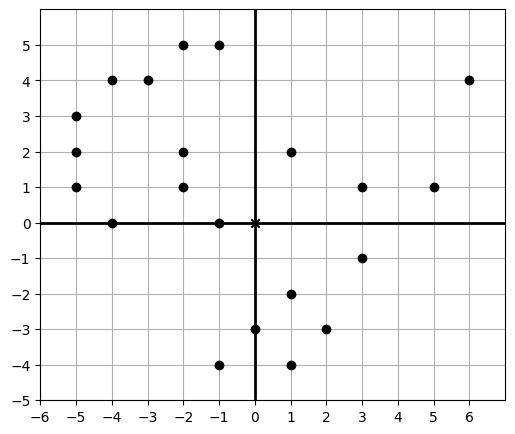

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

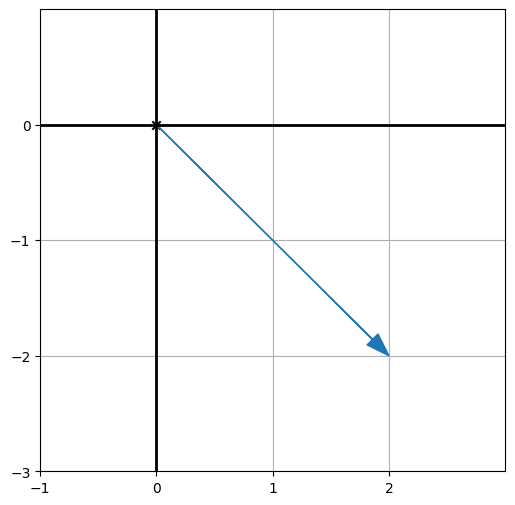

In [3]:
arrow_vectors = (2,-2)
draw(
    Arrow(arrow_vectors,(0,0),blue)
)   

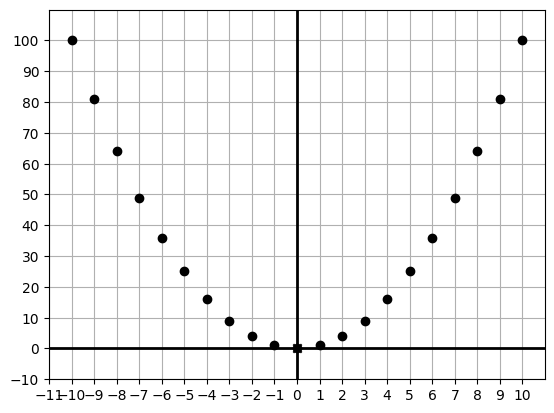

In [4]:
parabolic_vectors=[(x,x*x) for x in range (-10,11)]
draw(
    Points(*parabolic_vectors),grid=(1,10),nice_aspect_ratio=False
)

In [5]:
def add(*vectors):
    return sum([v[0] for v in vectors]),sum([v[1] for v in vectors])

In [6]:
a=[1,2]
b=[2,3]
c=[3,4]
add(a,b,c)

(6, 9)

In [7]:
def add(vector1,vector2):
    return vector1[0]+vector2[0],vector1[1]+vector2[1]

In [8]:
def translate(translation,*vectors):
    return [add(translation,v) for v in vectors]

In [9]:
translation=1,1
vectors=([0,0],[0,1],[-3,-3])
translate(translation,*vectors)

[(1, 1), (1, 2), (-2, -2)]

In [10]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

In [11]:
def scale(s,v):
    return (s*v[0],s*v[1])

In [12]:
from random import uniform

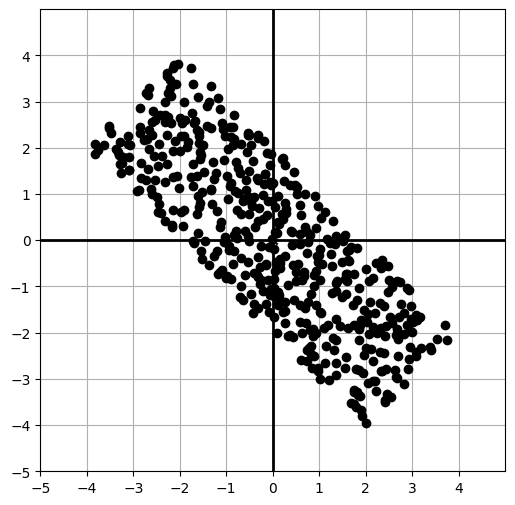

In [13]:
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)
z=(-1,1)
v=(1,1)
posibilities=[add(scale(random_r(),z),scale(random_s(),v)) for i in range(0,500)]
draw(Points(*posibilities))

In [14]:
def subtract(v1,v2):
    return (v1[0]-v2[0],v1[1]-v2[1])

In [15]:
def distance(v1,v2):
    vx=subtract(v1,v2)
    return sqrt(vx[0]**2+vx[1]**2)

In [16]:
def perimeter(vectors):
    distances=[distance(vectors[i],vectors[(i+1)%len(vectors)]) for i in range(0,len(vectors))]
    print(sum(distances))

In [17]:
perimeter([(1,0),(1,1),(0,1),(0,0)])

4.0


In [18]:
perimeter(dino_vectors)

44.77115093694564


In [19]:
for n in range(-12,15):
    for m in range(-14,13):
        if(distance((1,-1),(n,m)) == 13 and n>m>0):
            print((n,m))

(13, 4)


In [20]:
def length(vector):
    return sqrt(vector[0]**2+vector[1]**2)

In [21]:
print(length((-1.34,2.68)))

2.9963310898497184


In [22]:
from math import tan

In [23]:
print(tan(22/180*pi))

0.4040262258351568


In [24]:
def to_cartesian(length,radian):
    return (length*cos(radian),length*sin(radian))

In [25]:
from math import cos,sin

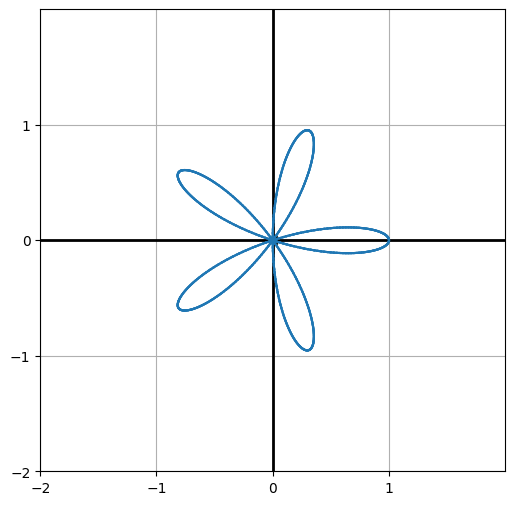

In [26]:
polars = [(cos(5*x*pi/500.0),2*pi*x/1000) for x in range(0,1000)]
points = [to_cartesian(*polar) for polar in polars]
draw(Polygon(*points))

In [27]:
from math import atan2
def to_polar(x,y):
    return (sqrt(x**2+y**2),atan2(y,x))

In [37]:
def rotate(angle, vectors):
    #将笛卡尔坐标转换成极坐标
    polars = [to_polar(v[0],v[1]) for v in vectors]
    rotated_polars = []
    for polar in polars:
        #旋转指定的角度
        rotated_polars.append((polar[0], polar[1] + angle/180*pi))
    return [to_cartesian(polar[0],polar[1]) for polar in rotated_polars]

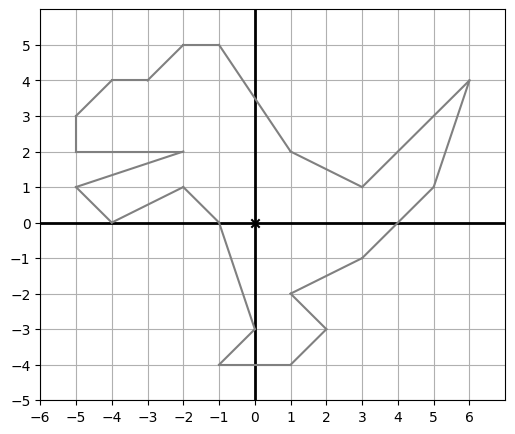

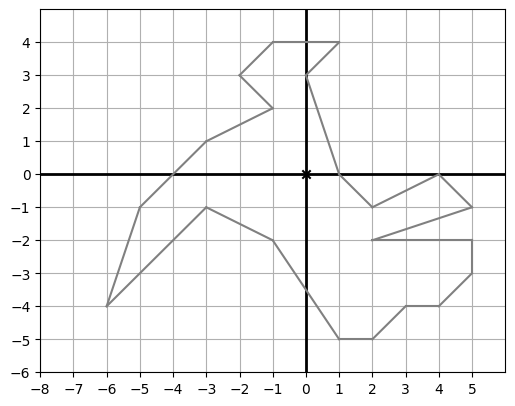

In [52]:
draw(Polygon(*dino_vectors,color=gray))
dino_rotation_vectors = rotate(180, dino_vectors)
draw(Polygon(*dino_rotation_vectors,color=gray))

In [48]:
def regular_polygon(n):
    vectors = []
    vector = [(1,0)]
    for i in range(0,n):
        vectors.append(rotate(360/n*i,vector)[0])
    return vectors

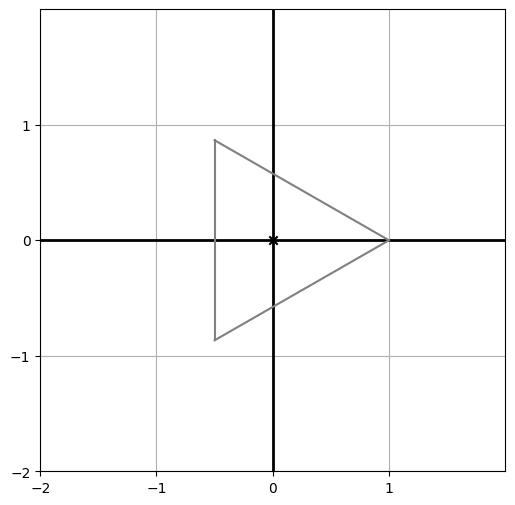

In [58]:
polygon = regular_polygon(3)
draw(Polygon(*polygon,color=gray))